# **Productivity Study**

## Objectives

* Answer business requirement 2:
  * The client is interested in what the correlation between the AI usage, the number of commits and bugs is.

## Inputs

* The Productivity_with_AI.csv file in 'outputs/datasets/collection/'

## Outputs

* Code that answers business requirement 2 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Portfolio-Project-5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Portfolio-Project-5'

# Load Data

Section 1 content

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/Productivity_with_AI.csv"))

df.head(10)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1
5,4.53,429,1,7.1,5,0,3.06,3.9,1
6,8.16,600,1,8.3,6,0,0.30,2.2,1
7,6.53,600,4,3.6,9,3,1.47,9.1,0
8,4.06,409,5,6.1,6,2,2.43,7.0,0
9,6.09,567,5,7.3,7,0,2.11,5.1,1


Create new df wit only the following variables: `commits`, `bugs_reported` and `ai_usage_hours`

In [5]:
study_df = df[['task_success', 'bugs_reported', 'ai_usage_hours']]
study_df

,task_success,bugs_reported,ai_usage_hours
0,1,1,0.71
1,1,3,1.75
2,1,0,2.27
3,0,5,1.40
4,1,0,1.26
...,...,...,...
495,1,0,0.91
496,0,2,1.38
497,1,0,0.41
498,0,0,1.52


---

# Data Exploration

For convenience, a ProfileReport is created again despite having it already done in the 'Productivity Study' notebook, to avoid having to switch back and forth.

In [6]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df=study_df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# AI Usage Correlation Study

In [7]:
correlation_pearson = study_df.corr(method='pearson')['ai_usage_hours'].sort_values(key=abs, ascending=False)[1:].head(10)
correlation_pearson

task_success     0.241668
bugs_reported    0.113885
Name: ai_usage_hours, dtype: float64

In [8]:
correlation_spearman = study_df.corr(method='spearman')['ai_usage_hours'].sort_values(key=abs, ascending=False)[1:].head(10)
correlation_spearman

task_success     0.264224
bugs_reported    0.141258
Name: ai_usage_hours, dtype: float64

In [9]:
# THIS CELL CAN BE DELETED
set(correlation_pearson[:4].index.to_list() + correlation_spearman[:4].index.to_list())

{'bugs_reported', 'task_success'}

# THIS CELL CAN BE DELETED
The four most relevant variables for task_success are: 'ai_usage_hours', 'coffee_intake_mg', 'commits', 'hours_coding'.

In [10]:
# THIS CELL CAN BE DELETED
relevant_vars = ['task_success', 'bugs_reported']
relevant_vars

['task_success', 'bugs_reported']

# Exploratory Data Analysis on relevant variables

In [11]:
df_eda = df.filter(relevant_vars + ['ai_usage_hours'])
df_eda.head()

,task_success,bugs_reported,ai_usage_hours
0,1,1,0.71
1,1,3,1.75
2,1,0,2.27
3,0,5,1.40
4,1,0,1.26


In [12]:
df_eda_success = df_eda[df_eda['task_success'] != 0]
df_eda_success

,task_success,bugs_reported,ai_usage_hours
0,1,1,0.71
1,1,3,1.75
2,1,0,2.27
4,1,0,1.26
5,1,0,3.06
...,...,...,...
490,1,3,1.05
491,1,1,3.28
492,1,1,2.32
495,1,0,0.91


In [13]:
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

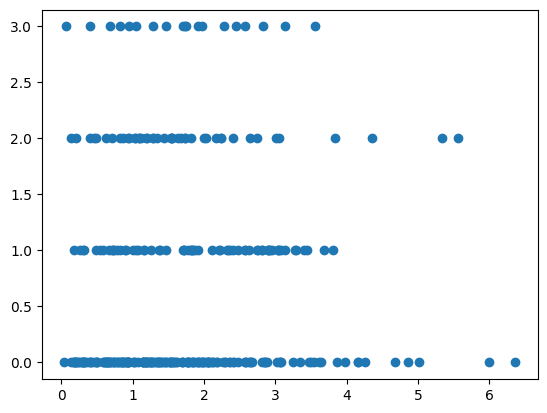

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data=df_eda_success, x='ai_usage_hours', y='bugs_reported')
plt.show

In [37]:
bins = [0,1,2,3,4,5,6]

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '>5']

df_eda_success['ai_usage_hours_category'] = pd.cut(df_eda_success['ai_usage_hours'], bins=bins, labels=labels, right=True)
df_eda_success

/tmp/ipykernel_671/1819597785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda_success['ai_usage_hours_category'] = pd.cut(df_eda_success['ai_usage_hours'], bins=bins, labels=labels, right=True)


,task_success,bugs_reported,ai_usage_hours,ai_usage_hours_category
0,1,1,0.71,0-1
1,1,3,1.75,1-2
2,1,0,2.27,2-3
4,1,0,1.26,1-2
5,1,0,3.06,3-4
...,...,...,...,...
490,1,3,1.05,1-2
491,1,1,3.28,3-4
492,1,1,2.32,2-3
495,1,0,0.91,0-1


In [44]:
value_counts = df_eda_success['bugs_reported'].value_counts()
value_counts

bugs_reported
0    174
1     65
2     45
3     19
Name: count, dtype: int64

In [38]:
df_eda_success_reduced = df_eda_success.drop(columns=['task_success', 'ai_usage_hours'], inplace=False)
df_eda_success_reduced

,bugs_reported,ai_usage_hours_category
0,1,0-1
1,3,1-2
2,0,2-3
4,0,1-2
5,0,3-4
...,...,...
490,3,1-2
491,1,3-4
492,1,2-3
495,0,0-1


In [ ]:
pivot_df_eda_success_reduced = pd.pivot_table(data=df_eda_success_reduced, index=['ai_usage_hours_category'], columns=['bugs_reported'], values=['bugs_reported'])
pivot_df_eda_success_reduced

ai_usage_hours_category
0-1
1-2
2-3
3-4
4-5
>5


TypeError: 'value' must be an instance of str or bytes, not a float

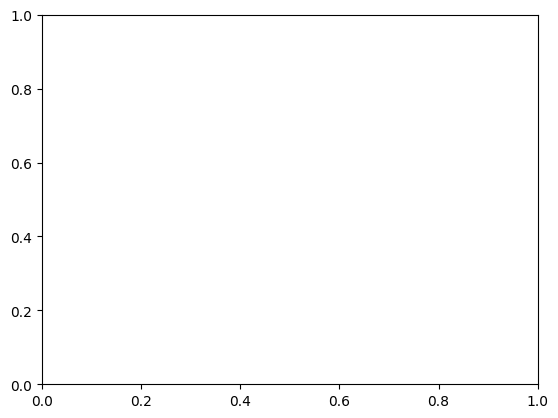

In [30]:
plt.hist([df_eda_success['ai_usage_hours_category'], df_eda_success['bugs_reported']], bins=10, stacked=True, label=['ai_usage_hours_category A', 'bugs_reported B'], alpha=0.7)
plt.show

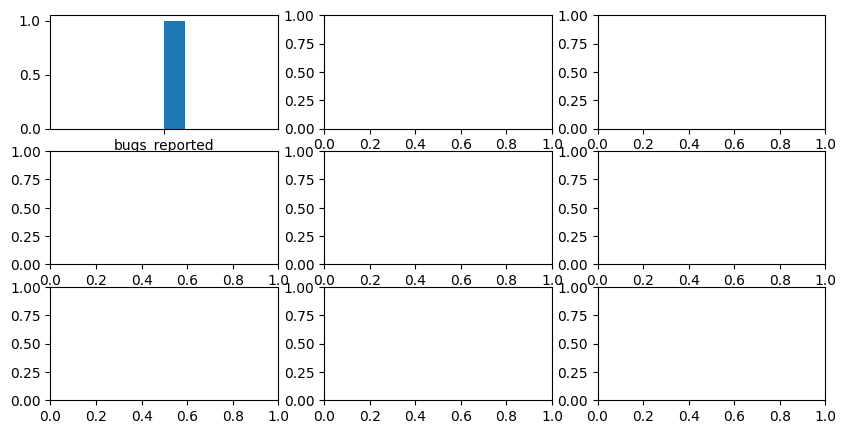

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,5))

axes[0,0].hist(data=df_eda_success['bugs_reported'],x='bugs_reported',label='ai_usage_hours_category')


plt.show()

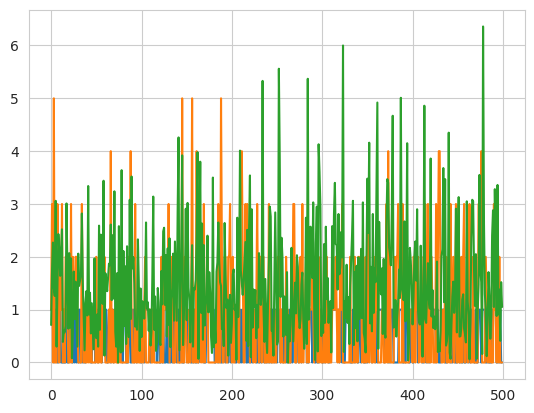

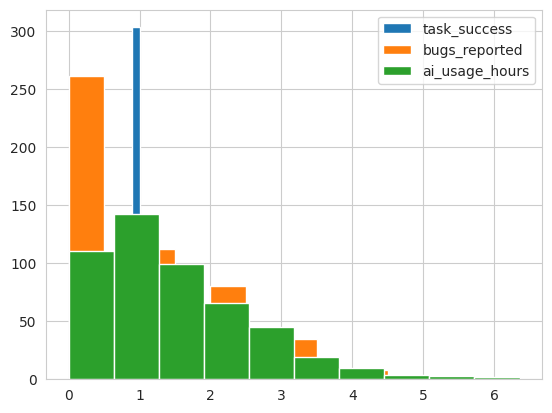

<function matplotlib.pyplot.show(close=None, block=None)>

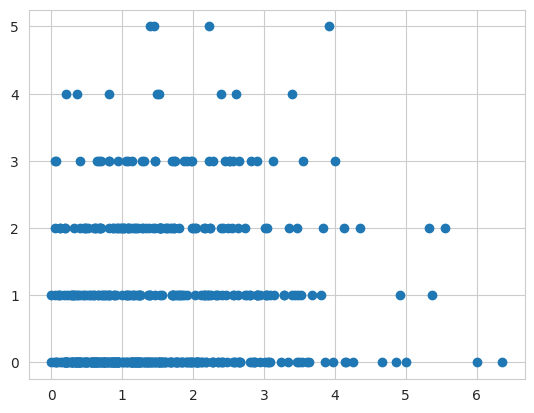

In [58]:
import matplotlib.pyplot as plt

plt.plot(df_eda[['task_success','bugs_reported','ai_usage_hours']])
plt.show()

for col in ['task_success','bugs_reported','ai_usage_hours']:
  plt.hist(data=df_eda,x=col,label=col)
plt.legend()
plt.show()

plt.scatter(data=study_df, x='ai_usage_hours', y= 'bugs_reported')
plt.show



In [67]:
df_eda.set_index('task_success', inplace=True, drop=True)
df_eda

,bugs_reported,ai_usage_hours
task_success,,
1,1,0.71
1,3,1.75
1,0,2.27
0,5,1.40
1,0,1.26
...,...,...
1,0,0.91
0,2,1.38
1,0,0.41


In [68]:
df_eda.sort_index(axis=0, ascending=True, inplace=True)
df_eda

,bugs_reported,ai_usage_hours
task_success,,
0,1,0.38
0,1,0.89
0,0,0.86
0,0,1.75
0,0,1.07
...,...,...
1,0,1.26
1,0,0.41
1,0,2.27


## The distribution by task_success

NOTE

In [18]:
%matplotlib inline

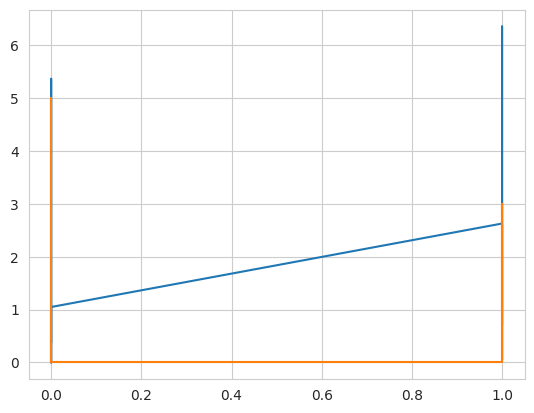

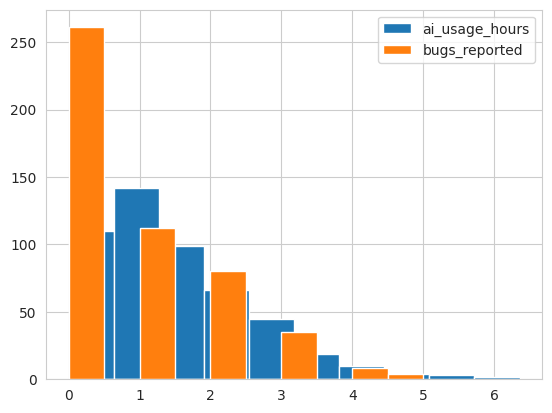

<function matplotlib.pyplot.show(close=None, block=None)>

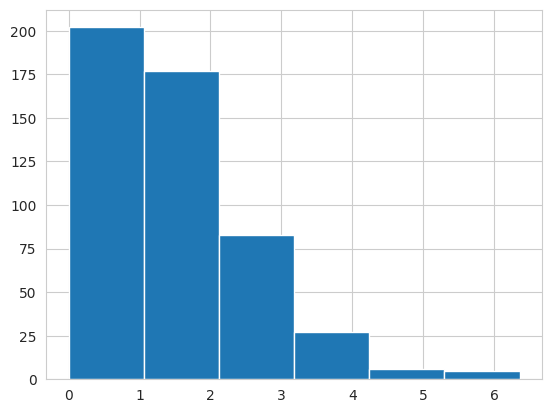

In [72]:
import matplotlib.pyplot as plt

plt.plot(df_eda[['ai_usage_hours','bugs_reported']])
plt.show()

for col in ['ai_usage_hours','bugs_reported']:
  plt.hist(data=df_eda,x=col,label=col)
plt.legend()
plt.show()

plt.hist(data=study_df, x='ai_usage_hours', bins=6)
plt.show

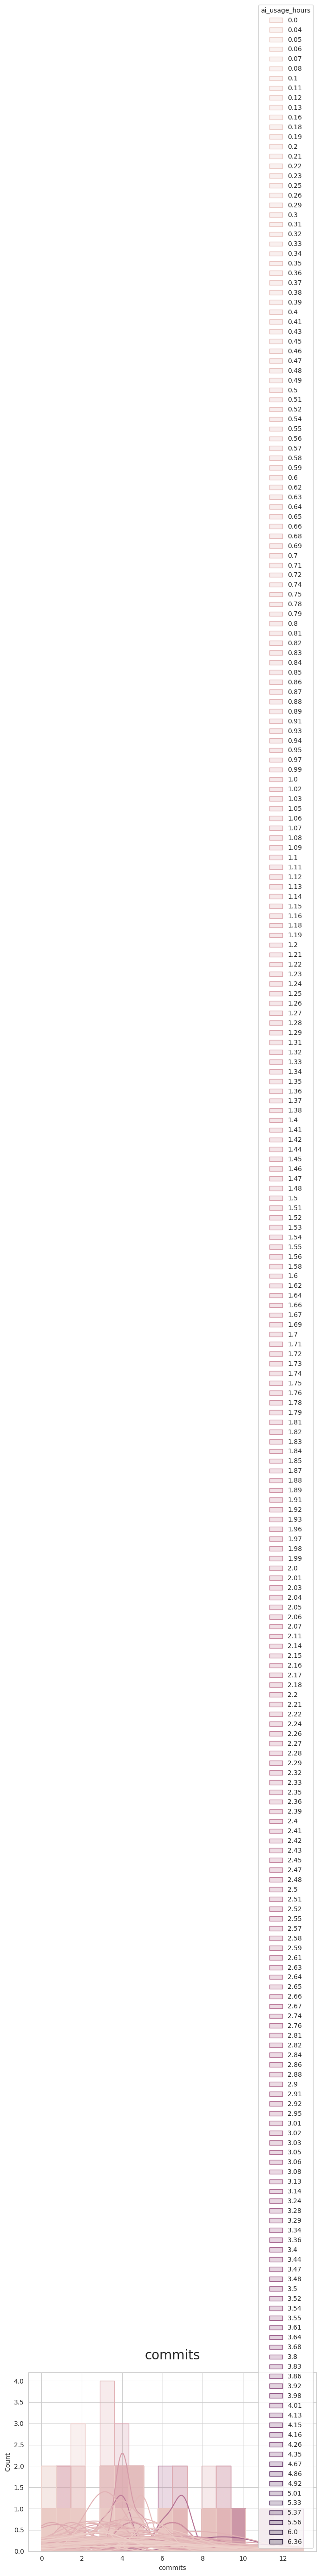

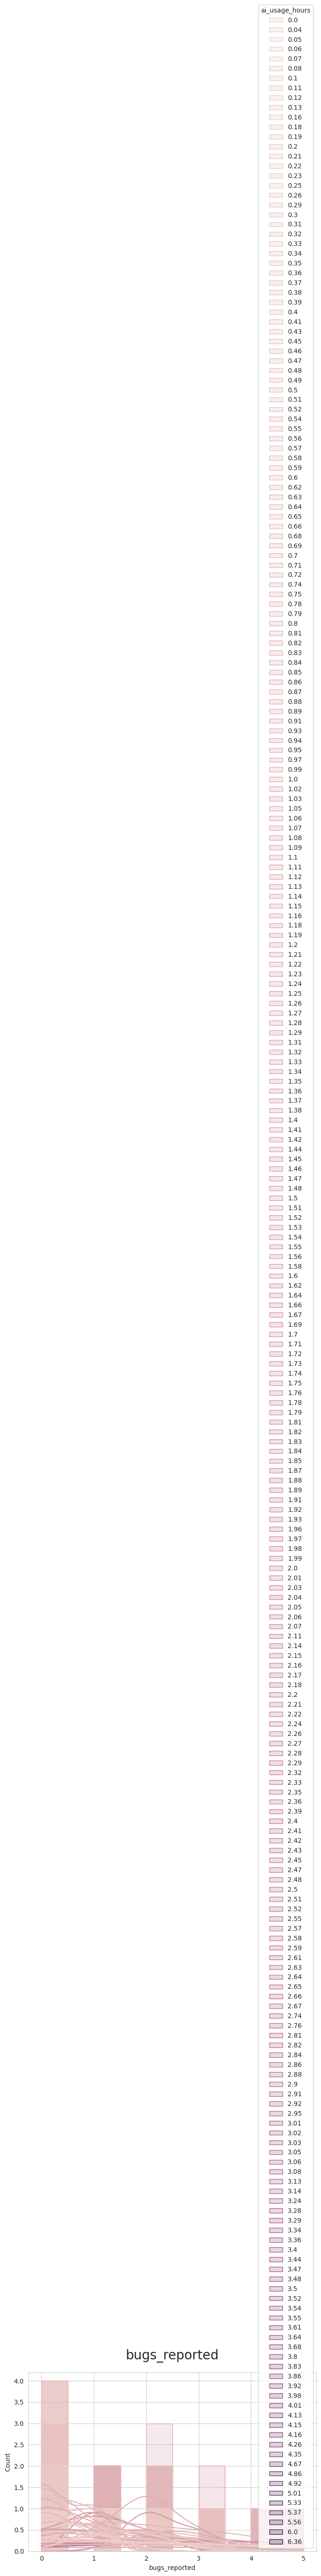

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'ai_usage_hours'
for col in relevant_vars:
    plot_numerical(df_eda, col, target_var)
    print("\n\n")

# Conclusion

* Counter to our hypothesis sleep_hours and distractions are not as relevant to task_success as other variables.
* The most relevant factors are caffeine_intake_mg and hours_coding which show a strong positive correlation to task_success.
* ai_usage shows weak correlation to task success.

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [13]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (2852421808.py, line 5)